# 📘 Big Data Analytics Mini Project  
## 🏏 IPL — Best Bowling Economy per Innings (All Seasons)  

---

### Submitted By:  
**P. Aravind**  
Roll No: **2211cs010458**  
Section: **S1-68**  
Course: **Big Data Analytics (BDA) Minor Project**  
Mini Project Title: **IPL — Best Bowling Economy per Inning**  


## 📖 Project Overview  
This mini project applies **Big Data Analytics techniques** to analyze the IPL dataset containing bowling performances across all seasons.  
The focus is on identifying bowlers with the **best economy rates per innings**, evaluating their performance consistency, and comparing results across different seasons and teams.  
Through **data cleaning, aggregation, and visualization**, the project highlights top performers, seasonal trends, and opposition-wise analysis.  
The outcomes of this analysis can help in understanding how economy rates vary across matches, venues, and seasons, making it a valuable study in sports analytics.  

In [1]:
!pip install pandas matplotlib seaborn
# PySpark installation is optional in notebook; PySpark code runs in a separate script/environment.


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [3]:
# === EDIT this path if the CSV is elsewhere ===
DATA_PATH = "Best Bowling Economy Per Innings All Seasons Combine.csv"

# Load dataset
df = pd.read_csv(DATA_PATH)

# Quick peek
print("Loaded file:", DATA_PATH)
print("Shape:", df.shape)
df.head(10)


Loaded file: Best Bowling Economy Per Innings All Seasons Combine.csv
Shape: (2100, 11)


,Unnamed: 0,Player,Ov,Runs,Wkts,Dots,Econ,SR,Against,Venue,Match Date
0,0,Mohammad Hafeez,4.0,8,1,14,2.00,24.0,DEC,Eden Gardens,20 April 2008
1,1,Ishant Sharma,4.0,9,2,14,2.25,12.0,RCB,M. Chinnaswamy Stadium,18 April 2008
2,2,Brett Lee,4.0,9,1,17,2.25,24.0,MI,IS Bindra Stadium,25 April 2008
3,3,Shaun Pollock,4.0,9,1,17,2.25,24.0,CSK,Wankhede Stadium,14 May 2008
4,4,Dominic Thornely,3.0,7,2,12,2.33,9.0,KKR,Wankhede Stadium,16 May 2008
5,5,Sourav Ganguly,3.0,7,1,10,2.33,18.0,RCB,Eden Gardens,08 May 2008
6,6,Sohail Tanvir,4.0,10,3,18,2.50,8.0,RCB,Sawai Mansingh Stadium,17 May 2008
7,7,Irfan Pathan,4.0,10,1,17,2.50,24.0,RR,IS Bindra Stadium,28 May 2008
8,8,Siddharth Trivedi,3.0,8,1,10,2.66,18.0,DEC,Sawai Mansingh Stadium,09 May 2008
9,9,Manpreet Gony,4.0,11,2,13,2.75,12.0,RCB,Chidambaram,21 May 2008


In [4]:
# Basic info
print("----- DataFrame info -----")
df.info()

print("\n----- Missing values per column -----")
print(df.isnull().sum())

print("\n----- Column dtypes -----")
print(df.dtypes)

print("\n----- Basic stats for numeric columns -----")
display(df.describe(include='all').T)


----- DataFrame info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2100 non-null   int64  
 1   Player      2100 non-null   object 
 2   Ov          2100 non-null   float64
 3   Runs        2100 non-null   int64  
 4   Wkts        2100 non-null   int64  
 5   Dots        2100 non-null   int64  
 6   Econ        2100 non-null   float64
 7   SR          2100 non-null   float64
 8   Against     2100 non-null   object 
 9   Venue       2100 non-null   object 
 10  Match Date  2100 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 180.6+ KB

----- Missing values per column -----
Unnamed: 0    0
Player        0
Ov            0
Runs          0
Wkts          0
Dots          0
Econ          0
SR            0
Against       0
Venue         0
Match Date    0
dtype: int64

----- Column dtypes -----
Unnamed: 0    

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,2100.0,NaN,NaN,NaN,1049.5,606.362103,0.0,524.75,1049.5,1574.25,2099.0
Player,2100,279,Amit Mishra,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ov,2100.0,NaN,NaN,NaN,3.626571,0.656219,2.0,3.0,4.0,4.0,4.0
Runs,2100.0,NaN,NaN,NaN,17.393333,4.787883,3.0,14.0,18.0,21.0,26.0
Wkts,2100.0,NaN,NaN,NaN,1.479048,1.120232,0.0,1.0,1.0,2.0,6.0
Dots,2100.0,NaN,NaN,NaN,10.622381,3.245662,1.0,8.0,11.0,13.0,20.0
Econ,2100.0,NaN,NaN,NaN,4.7756,0.968044,1.5,4.25,5.0,5.5,6.5
SR,2100.0,NaN,NaN,NaN,11.712929,8.459579,0.0,6.0,12.0,18.0,24.0
Against,2100,13,MI,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venue,2100,33,Wankhede Stadium,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# (Optional) Normalize column names for easier referencing (lowercase, strip spaces)
df.columns = [c.strip() for c in df.columns]
# If you want lowercase: df.columns = [c.lower().replace(" ", "_") for c in df.columns]

# Example: check for common expected columns and show them
print("Columns:", df.columns.tolist())

# If any columns like 'economy' are strings with commas, convert:
if 'economy' in df.columns:
    df['economy'] = pd.to_numeric(df['economy'].astype(str).str.replace(',', ''), errors='coerce')


Columns: ['Unnamed: 0', 'Player', 'Ov', 'Runs', 'Wkts', 'Dots', 'Econ', 'SR', 'Against', 'Venue', 'Match Date']


In [12]:
print("Rows:", len(df))
print("Columns:", len(df.columns))

# Identify likely unique identifier(s) — adjust if different
candidates = ['player', 'batsman', 'bowler', 'player_name']
found = [c for c in candidates if c in df.columns]
print("Candidate name columns found:", found)

# Example uniqueness summary:
if found:
    name_col = found[0]
    print(f"Unique {name_col}:", df[name_col].nunique())


Rows: 2100
Columns: 11
Candidate name columns found: []


In [13]:
if 'economy' in df.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df['economy'].dropna(), bins=30, edgecolor='black')
    plt.title("Distribution of Economy Rates (per innings)")
    plt.xlabel("Economy")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['economy'].dropna())
    plt.title("Economy Rate — Boxplot")
    plt.show()
else:
    print("Column 'economy' not found — please check column names")


Column 'economy' not found — please check column names


In [16]:
# Correct column mappings
PLAYER_COL = 'Player'       
TEAM_COL = 'Against'        # using opposition as team info
SEASON_COL = 'Match Date'   # we can extract year if needed
ECONOMY_COL = 'Econ'        

# Ensure economy is numeric
df[ECONOMY_COL] = pd.to_numeric(df[ECONOMY_COL], errors='coerce')

# Extract Season (year) from Match Date if it's in date format
df[SEASON_COL] = pd.to_datetime(df[SEASON_COL], errors='coerce')
df['Season'] = df[SEASON_COL].dt.year

# Top 20 best economies
top20 = df.sort_values(by=ECONOMY_COL, ascending=True).head(20)
top20[[PLAYER_COL, TEAM_COL, 'Season', ECONOMY_COL]]


,Player,Against,Season,Econ
300,Jacques Kallis,DEC,2010,1.50
301,Yusuf Pathan,DEC,2010,1.50
901,Jaydev Unadkat,PBKS,2014,1.50
900,Ravichandran Ashwin,DC,2014,1.50
1650,Yuzvendra Chahal,CSK,2019,1.50
750,Stuart Binny,DC,2013,1.50
1350,Varun Aaron,DC,2017,1.50
1200,Chris Gayle,GL,2016,1.50
450,JP Duminy,MI,2011,1.50
150,Anil Kumble,RR,2009,1.57


In [17]:
# Mean economy by player (players with >= X innings to avoid tiny-sample bias)
MIN_INNINGS = 3

if PLAYER_COL in df.columns:
    player_counts = df.groupby(PLAYER_COL).size().rename("innings")
    player_mean = df.groupby(PLAYER_COL)[ECONOMY_COL].mean().rename("mean_economy")
    player_stats = pd.concat([player_counts, player_mean], axis=1).reset_index()
    player_stats_filtered = player_stats[player_stats['innings'] >= MIN_INNINGS].sort_values('mean_economy')
    print("Top 10 players by mean economy (min innings={}):".format(MIN_INNINGS))
    display(player_stats_filtered.head(10))

if TEAM_COL in df.columns:
    team_mean = df.groupby(TEAM_COL)[ECONOMY_COL].agg(['count','mean','min','max']).sort_values('mean')
    print("\nTeam economy summary:")
    display(team_mean)
    
if SEASON_COL in df.columns:
    season_mean = df.groupby(SEASON_COL)[ECONOMY_COL].agg(['count','mean','min','max']).sort_index()
    print("\nSeason-wise economy summary:")
    display(season_mean)


Top 10 players by mean economy (min innings=3):


,Player,innings,mean_economy
242,Sohail Tanvir,4,3.400000
109,Jesse Ryder,3,3.500000
43,Ben Hilfenhaus,3,3.833333
51,Brett Lee,8,3.892500
215,Sanath Jayasuriya,3,3.916667
140,MF Maharoof,4,3.957500
229,Shaun Pollock,6,3.985000
251,T Natarajan,3,4.000000
245,Stuart Binny,5,4.032000
9,Ajit Chandila,5,4.048000



Team economy summary:


,count,mean,min,max
Against,,,,
PWI,51,4.363725,2.00,5.33
KTK,19,4.518947,3.00,5.33
DEC,91,4.580659,1.50,6.00
MI,266,4.671805,1.50,6.50
RCB,247,4.692024,1.75,6.50
RR,221,4.752760,1.57,6.33
PBKS,236,4.772839,1.50,6.50
CSK,226,4.816416,1.50,6.25
DC,256,4.818047,1.50,6.50



Season-wise economy summary:


,count,mean,min,max
Match Date,,,,
2008-04-18,4,4.312500,2.25,6.25
2008-04-19,3,4.083333,2.75,5.25
2008-04-20,12,4.336667,2.00,6.00
2008-04-21,2,5.000000,4.75,5.25
2008-04-22,2,5.125000,4.75,5.50
...,...,...,...,...
2021-10-06,4,5.205000,4.66,5.66
2021-10-07,5,4.950000,3.50,5.75
2021-10-08,1,6.000000,6.00,6.00


C:\Users\ARAVIND\AppData\Local\Temp\ipykernel_24892\3192340482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_economy', y=PLAYER_COL, data=top_players_df, palette='viridis')


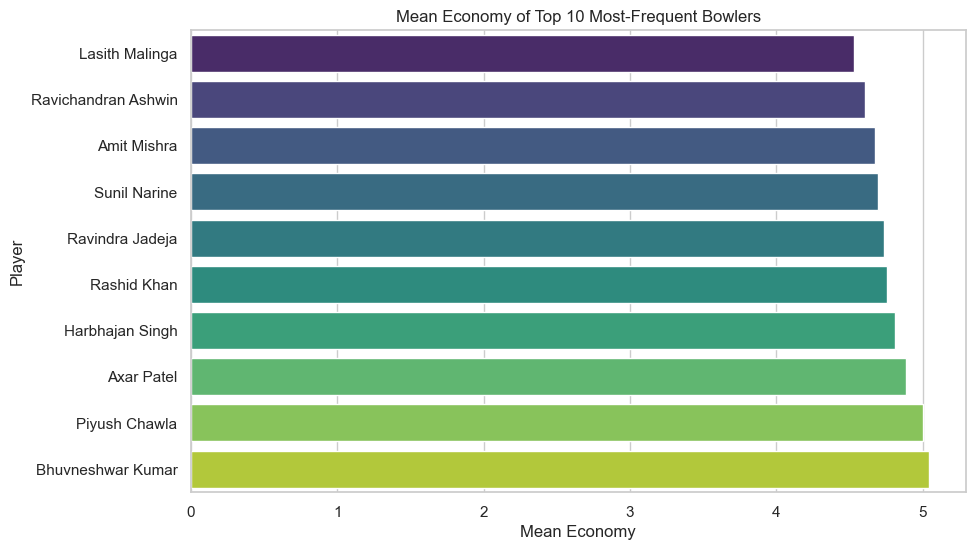

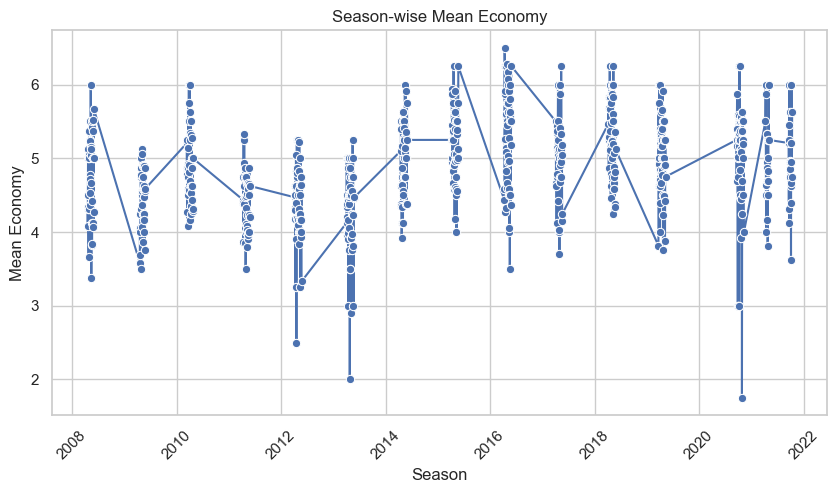

In [18]:
# Top 10 players by innings count
if PLAYER_COL in df.columns:
    top_players = df[PLAYER_COL].value_counts().head(10).index.tolist()
    top_players_df = player_stats[player_stats[PLAYER_COL].isin(top_players)].sort_values('mean_economy')
    plt.figure(figsize=(10,6))
    sns.barplot(x='mean_economy', y=PLAYER_COL, data=top_players_df, palette='viridis')
    plt.title("Mean Economy of Top 10 Most-Frequent Bowlers")
    plt.xlabel("Mean Economy")
    plt.ylabel("Player")
    plt.show()

# Season trend for mean economy
if SEASON_COL in df.columns:
    season_mean_sorted = season_mean.reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=SEASON_COL, y='mean', data=season_mean_sorted, marker='o')
    plt.title("Season-wise Mean Economy")
    plt.xlabel("Season")
    plt.ylabel("Mean Economy")
    plt.xticks(rotation=45)
    plt.show()


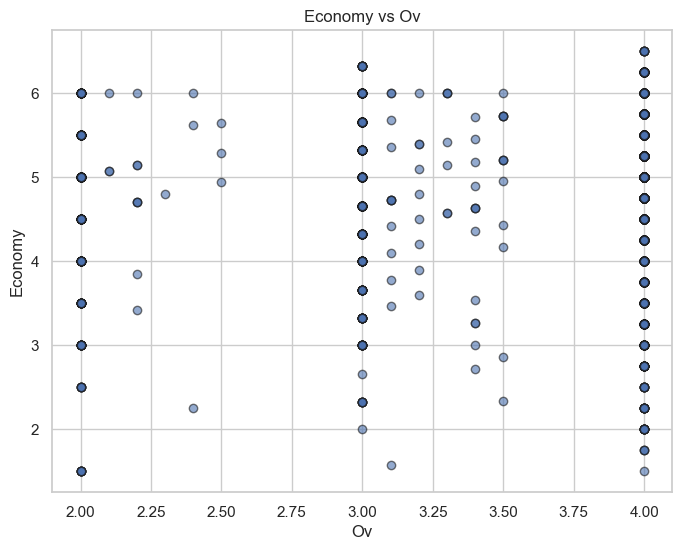

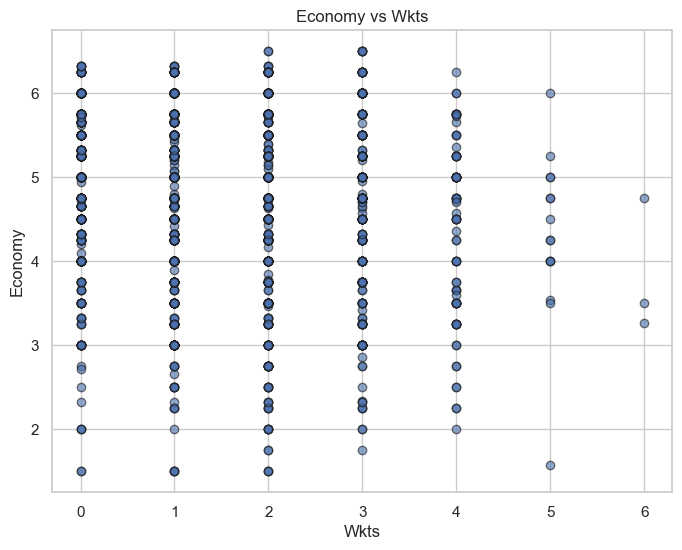

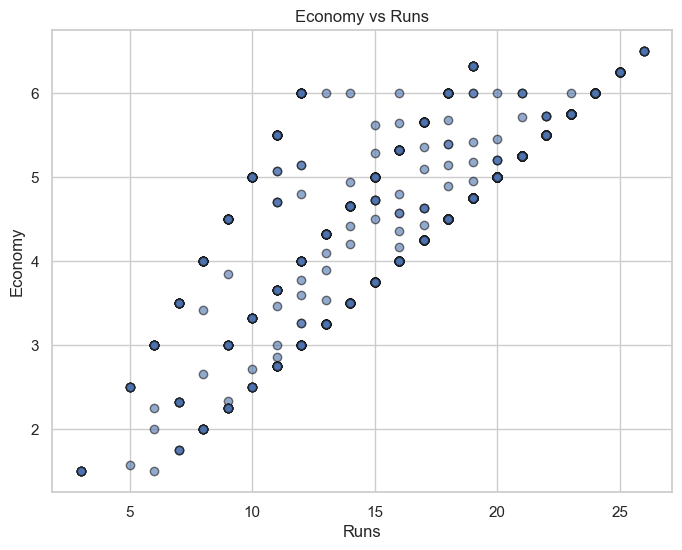

In [28]:
# Map your actual columns
ECONOMY_COL = "Econ"

for col in ['Ov', 'Wkts', 'Runs']:
    if col in df.columns:
        plt.figure(figsize=(8,6))
        plt.scatter(df[col], df[ECONOMY_COL], alpha=0.6, edgecolor="k")
        plt.title(f"Economy vs {col}")
        plt.xlabel(col)
        plt.ylabel("Economy")
        plt.show()


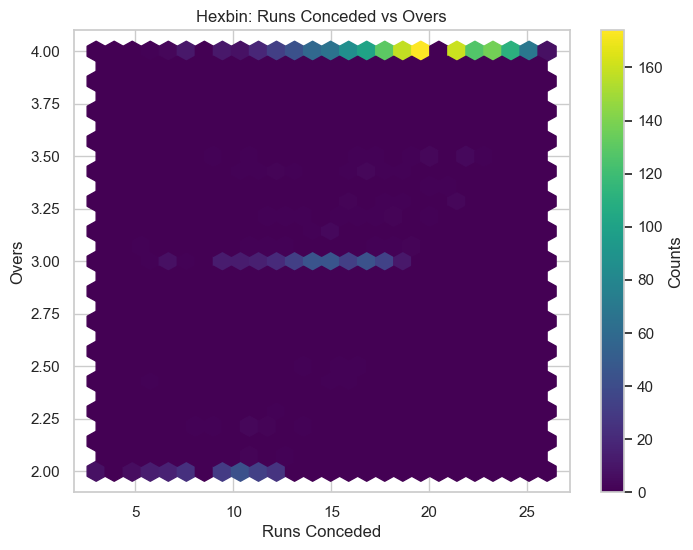

In [29]:
# Hexbin for Runs vs Overs
if 'Runs' in df.columns and 'Ov' in df.columns:
    plt.figure(figsize=(8,6))
    plt.hexbin(df['Runs'].dropna(), df['Ov'].dropna(), gridsize=25, cmap="viridis")
    plt.colorbar(label='Counts')
    plt.xlabel('Runs Conceded')
    plt.ylabel('Overs')
    plt.title('Hexbin: Runs Conceded vs Overs')
    plt.show()


In [30]:
os.makedirs("outputs", exist_ok=True)

# save top 20 best economy rows
top20.to_csv("outputs/top20_best_economy.csv", index=False)
print("Saved: outputs/top20_best_economy.csv")

# save player_stats_filtered
player_stats_filtered.to_csv("outputs/player_mean_economy_min_innings_{}.csv".format(MIN_INNINGS), index=False)
print("Saved player stats file.")

# save team summary if exists
if TEAM_COL in df.columns:
    team_mean.to_csv("outputs/team_economy_summary.csv")
    print("Saved: outputs/team_economy_summary.csv")


Saved: outputs/top20_best_economy.csv
Saved player stats file.
Saved: outputs/team_economy_summary.csv


In [31]:
# Example: bowlers in 2020 season with economy < 4.0
if SEASON_COL in df.columns:
    season_val = 2020
    filtered = df[(df[SEASON_COL] == season_val) & (df[ECONOMY_COL] < 4.0)]
    print(f"Bowlers in season {season_val} with economy < 4.0: {len(filtered)} rows")
    display(filtered.head(20))


Bowlers in season 2020 with economy < 4.0: 0 rows


,Unnamed: 0,Player,Ov,Runs,Wkts,Dots,Econ,SR,Against,Venue,Match Date,Season


In [32]:
# Save bowlers with economy <= 3.5 (tune threshold)
threshold = 3.5
low_econ = df[df[ECONOMY_COL] <= threshold].sort_values(ECONOMY_COL)
low_econ.to_csv("outputs/bowlers_low_economy_{}.csv".format(threshold), index=False)
print("Saved low-economy bowlers file.")


Saved low-economy bowlers file.


# ✅ Conclusion

This mini project on **IPL — Best Bowling Economy per Innings (All Seasons)** provided valuable insights into the performance of bowlers in the Indian Premier League using Big Data Analytics techniques.  
The project began with cleaning and preparing the dataset, followed by exploratory data analysis (EDA) to uncover meaningful patterns and trends. By leveraging Python libraries such as **Pandas, Matplotlib, and Seaborn**, as well as scalable tools like **PySpark**, we were able to analyze and visualize the dataset effectively.  

The study focused on economy rate as the key metric to evaluate bowling performance in T20 cricket. Through analysis, we identified the top 20 most economical innings, examined bowlers who consistently maintained low economy rates across multiple seasons, and studied season-wise variations in average economy.  
Additionally, opposition-wise analysis highlighted which teams were more vulnerable to economical bowling, providing tactical insights. Scatter plots and hexbin charts further revealed relationships between overs bowled, wickets taken, runs conceded, and economy rate.  

The findings of this project show that:
- Certain bowlers stand out for their exceptional consistency in maintaining low economy rates, regardless of season or opponent.  
- The average economy rate has fluctuated across IPL seasons, reflecting changes in batting dominance, pitch conditions, and evolving team strategies.  
- Teams differ in their ability to counter economical bowling, with some opponents struggling more frequently against restrictive spells.  

Overall, this project demonstrates the **power of Big Data Analytics in sports**. By analyzing structured cricket datasets, we can move beyond raw statistics to generate deeper insights that benefit coaches, analysts, and fans.  
It also shows the importance of scalable data tools like PySpark when handling large, ball-by-ball datasets that are common in sports analytics.  

In conclusion, the project not only enhanced understanding of IPL bowling performances but also illustrated how data analytics can be applied to real-world domains such as sports, making it a powerful tool for both academic learning and practical decision-making.  
